# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

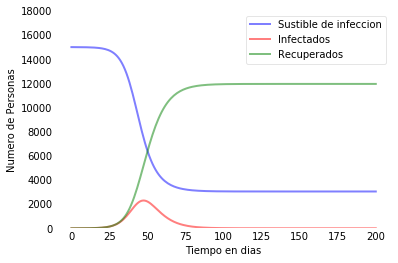

In [2]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

# Total de la poblacion
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Ro = beta/gamma
#print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


In [3]:
url = 'C:\\Users\\Braulio Castro\\Desktop\\10 Ciclo\\Simulacion\\Tareas\\SimulacionPython-master\\data\\data\\time_series_19_covid_combined.csv'

df = pd.read_csv(url)
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed','Recovered']]
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df


,Date,Confirmed,Recovered
8586,60,6.0,0.0
8587,61,6.0,0.0
8588,62,7.0,0.0
8589,63,10.0,0.0
8590,64,13.0,0.0
8591,65,13.0,0.0
8592,66,13.0,0.0
8593,67,14.0,0.0
8594,68,15.0,0.0
8595,69,15.0,0.0


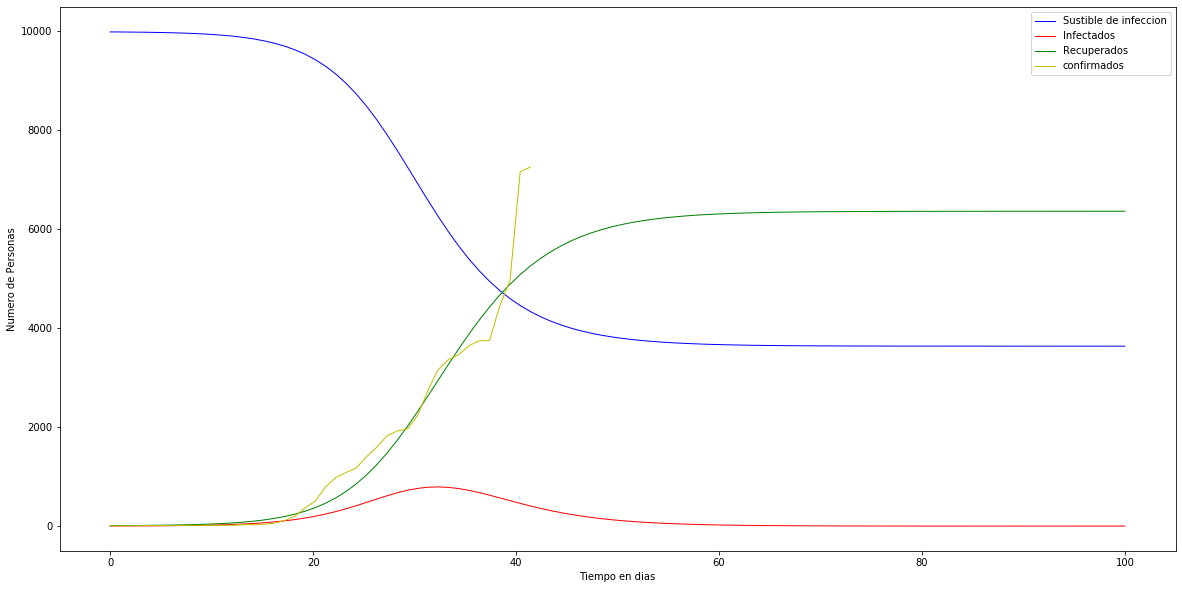

In [8]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador
# 1. Implementar solo teniendo en cuenta los casos confirmados
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

def loss(point, datos, s0, i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - datos)**2))

#Numero habitantes del Ecuador
N=10000
#casos confirmados
i0=2
#Recuperados
r0=10
#Resto de la poblacion
s0= N - i0 - r0

x = np.array(df['Date'])

y = list(df.iloc [:, 1])
datos=list(df.iloc [:, 1])
optimal = minimize(loss, [0.001, 0.001], args=(datos,s0,i0, r0), method='L-BFGS-B', bounds=[(0.00000001,0.4), (0.00000001, 0.4)])   
beta, gamma = optimal.x
new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
t = np.linspace(0, 100, 100)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0,i0,r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
xa=t[0:42]
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=1, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=1, lw=1, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=1, label='Recuperados')
ax.plot(xa, ea, 'y', alpha=1, lw=1, label='confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()


Beta=  9.831948481116106e-06
Gamma=  1e-08


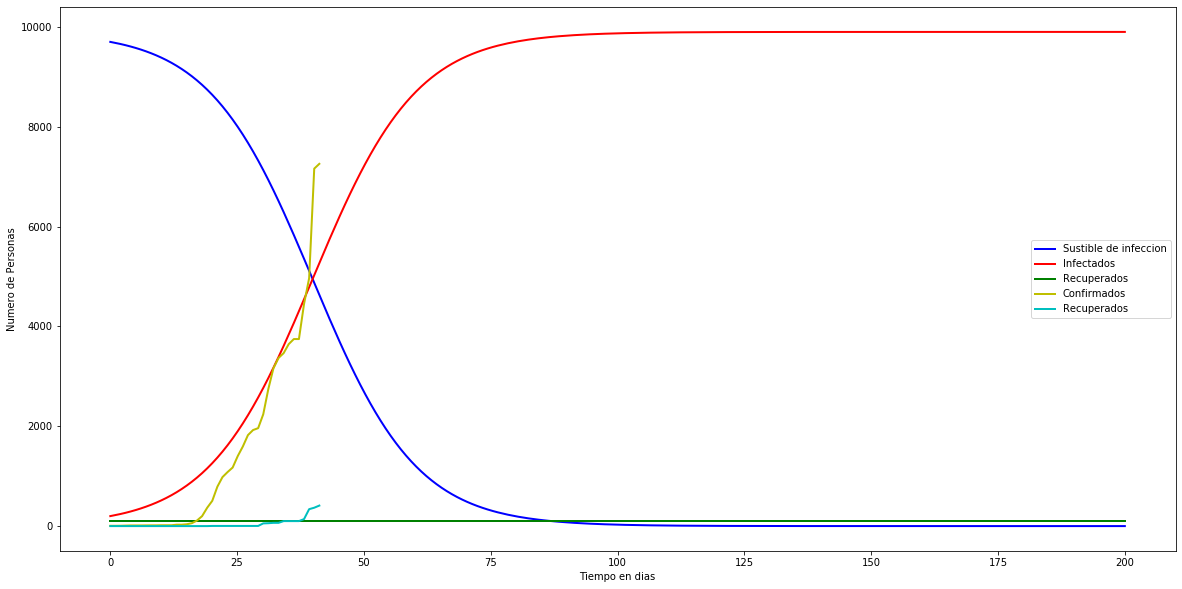

In [7]:

# 3. Implementar teniendo en cuenta los casos confirmados y recuperados.

def loss(point, datos, recovered,s0,i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - datos)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha =0.1
    return alpha * l1 + (1 - alpha) * l2
#Numero habitantes del Ecuador
N=10000
#casos confirmados
i0=200
#Recuperados
r0=100
#Resto de la poblacion
s0= N - i0 - r0
recovered=list(df.iloc [:, 2])
y=list(df.iloc [:, 1])
datos=list(df.iloc [:, 1])
d=[x1 - x2 for (x1, x2) in zip(datos,recovered)]
optimal = minimize(loss, [0.001, 0.001], args=(d, recovered, s0, i0, i0), method='L-BFGS-B', bounds=[(0.00000001, 0.04), (0.00000001, 0.04)])
beta, gamma = optimal.x
print("Beta= ",beta)
print("Gamma= ",gamma)
new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
er = np.concatenate((recovered, [None] * (size - len(recovered))))
xa=t[0:42]

t = np.linspace(0, 200,200)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I- gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
# Vector de condiciones iniciales
y0 = s0,i0,r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=1, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=2, label='Recuperados')
ax.plot(xa, y, 'y', alpha=1, lw=2, label='Confirmados')
ax.plot(xa, er, 'c', alpha=1, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
legend = ax.legend()


## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [35]:
# Implementar
import statistics as stats
casosNuevos=df.iloc [:, 1]
dias=df.iloc [:, 0]
totalPersonas=17023000
#Inicdencia desde el dia uno
#n=4 numero de mortailidad por caso de pandemia 
incidencia=(casosNuevos/totalPersonas)*1**4
print("Inicidencia\n",incidencia)

totalCasos=7257
#prevalencia desde el dia uno
prevalencia=((casosNuevos/totalPersonas)*1**4)*stats.median(dias)
print("\nPrevalencia\n",prevalencia)



Inicidencia
 8586    3.524643e-07
8587    3.524643e-07
8588    4.112084e-07
8589    5.874405e-07
8590    7.636727e-07
8591    7.636727e-07
8592    7.636727e-07
8593    8.224167e-07
8594    8.811608e-07
8595    8.811608e-07
8596    9.986489e-07
8597    9.986489e-07
8598    9.986489e-07
8599    1.644833e-06
8600    1.644833e-06
8601    2.173530e-06
8602    3.407155e-06
8603    6.520590e-06
8604    1.169007e-05
8605    2.155907e-05
8606    2.972449e-05
8607    4.634906e-05
8608    5.762792e-05
8609    6.356106e-05
8610    6.890677e-05
8611    8.241791e-05
8612    9.369676e-05
8613    1.070904e-04
8614    1.130236e-04
8615    1.152558e-04
8616    1.315867e-04
8617    1.614287e-04
8618    1.858074e-04
8619    1.978500e-04
8620    2.035481e-04
8621    2.141808e-04
8622    2.201140e-04
8623    2.201140e-04
8624    2.614110e-04
8625    2.916642e-04
8626    4.206662e-04
8627    4.263056e-04
Name: Confirmed, dtype: float64

Prevalencia
 8586    0.000028
8587    0.000028
8588    0.000033
8589    

## Analisis
Se obtiene el calculo del modelo SIR con los datos de :

Numero de habitantes del Ecuador = 17 millones 

Numero personas infectadas

Numero de personas recuperadas 

De acuerdo a estos datos se procede a calcular beta y gamma en el método loss 
Que utiliza el método minimize(), de la librería scipy.optimize que necesita un objeto como parámetro y los datos de  mínimos en los arreglos [0.001, 0.001] y el method='L-BFGS-B'
Con estos datos el modelo SIR desarrollo las predicciones de los datos 
En las gráficas como se observa en el programa mostrando las curvas y su crecimiento y su relación 


## Conclusiones
 Si la curva de recuperados sube entonces las personas susceptibles de infección baja y por lo tanto los infectos se mantienen en una curva baja creciente, estos datos depende de los valores que se asignen ah gamma y beta, y también del numero de habitantes en el caso de que el número de habitantes sea alto y los contagios sean pocos las gráficas mostraran líneas continuas, como se observa en la simulación realiza para 17 millones de habitantes con casos confirmados de 7257 y recuperados 411, y de acuerdo al tutorial seguido el calculo de beta y gamma es :
 
Valor Beta=  9.831948481116106e-06

Valor Gamma=  1e-08


## Opinion
Como país observamos día a día como el caso de contagios aumenta a un paso veloz, esto se debe a la falta de apoyo de la población ya que al no realizar la cuarentana, el numero aumenta pero el numero de recuperados es mínimo es se debe a que el país no tiene la gestión necesaria, ni buenos lideres que puedan llevar de mejor manera la situación, dado esto en los hospitales no se cuenta con los recursos necesarios para brindar ayuda a las personas, tampoco el personal médico tiene los recurso para protegerse, y así los casos aumentan. La ciudadanía también debería ser más responsable y acatar las normas de seguridad y prevención, gracias a que un número grande de personas oh acata esas reglas hoy en día se ve como el país poco a poco se va sumiendo en el caos y por esto somos en país en la región con los índices mas altos de contagio de covid-19 
No solo es culpa del gobierno si no de nosotros como ciudadanos a no ser disciplinados y tomar esto con la seriedad que se merece.
Dado ah que no se conocen las cifras exactas de contagios y muertes ya que el gobierno esconde información y miente al país el modelo de simulación no es preciso y tal vez no muestre los datos correctos  


# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2